# Perceptron

A **Perceptron** is a simple artificial neural network unit that takes multiple inputs, performs a weighted sum of these inputs, and applies a threshold function to produce an output.

It's essentially a basic building block of neural networks, serving as a simplified model of a biological neuron.

<img src="https://drive.google.com/uc?id=18Ar9x38STGTjuRCzJe90Oha6cDmFhE3J" width="400">

**Inputs**: A neuron takes multiple inputs, often represented as x
1
​
 ,x
2
​
 ,…,x
n
​
 , each of which is associated with a weight w
1
​
 ,w
2
​
 ,…,w
n
​
 . A bias term b is usually added as well.

**Weighted Sum**: The neuron calculates a weighted sum of the inputs z, using the formula:

$$
z = \sum_{i=1}^{n} w_i x_i + b
$$

**Activation Function**: The neuron then applies an activation function to this weighted sum to introduce non-linearity into the model.
$$
a = f(z)
$$

Common activation functions include the sigmoid, ReLU, and tanh functions.

**Output**: The result, α  is the neuron's output, which is passed to the next layer in the network.

## Perceptron implementation on `XOR` data using TensorFlow







In [ ]:
# Importing the libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Create sample input features (X) and corresponding labels (y) for a simple XOR problem.

<img src="https://drive.google.com/uc?id=1dkHgBdM2QBpL2IHdJtbN3fFLvkL8E84M" width=400/>


In [ ]:
# Defining the dataset

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features
y = np.array([0, 1, 1, 0])  # Corresponding labels

 Define a perceptron model with a single neuron using `tf.keras.Sequential`

In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

**Important Arguments:**

* `Dense` layer represents the perceptron
* `sigmoid` activation function is used to produce output values between 0 and 1.

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Important Arguments:**

* `Adam optimizer` is used to update weights during training. It maintains moving averages of the first and second moments of gradients.
* `Binary_crossentropy` cost function is used to measure the model's error. It calculates the difference between the predicted probabilities and the true binary labels.  It penalizes incorrect predictions more heavily.
* `accuracy` is used to validate the performace of the model.


In [ ]:
# Fitting the model
history = model.fit(X, y, epochs=100, batch_size=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2667 - loss: 0.7331      
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4667 - loss: 0.6460 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1000 - loss: 0.7316     
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4667 - loss: 0.6338 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2667 - loss: 0.6949     
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2667 - loss: 0.6947     
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4667 - loss: 0.6385 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4667 - loss: 0.6597 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2667 - loss: 0.6777     
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1000 - loss: 0.7670     
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1000 - loss: 0.7264     
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

**Important Arguments:**

* `X, y`: Training data and labels.
* `batch_size`: Number of samples per gradient update.
* `epochs`: Number of epochs to train the model.

In [ ]:
# Evaluating the model
loss, accuracy = model.evaluate(X, y)
print("Loss:", loss)
print("Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.2500 - loss: 0.6986
Loss: 0.6986216902732849
Accuracy: 0.25


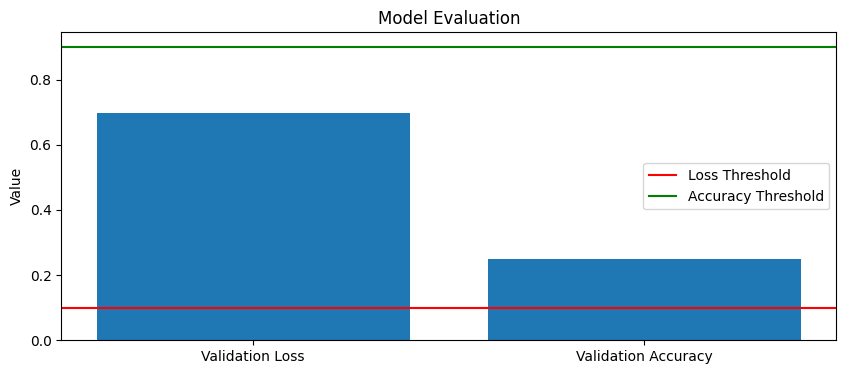

In [ ]:
# Set a threshold for loss and accuracy
loss_threshold = 0.1
accuracy_threshold = 0.9

# Create a bar chart to visualize the values against thresholds
plt.figure(figsize=(10, 4))
plt.bar(['Validation Loss', 'Validation Accuracy'], [loss, accuracy])
plt.axhline(y=loss_threshold, color='r', linestyle='-', label='Loss Threshold')
plt.axhline(y=accuracy_threshold, color='g', linestyle='-', label='Accuracy Threshold')
plt.title('Model Evaluation')
plt.ylabel('Value')
plt.legend()
plt.show()

Here we can clearly see the **perceptron's** inability to learn the **XOR** function. A single-layer perceptron is incapable of learning this function because it can only represent linearly separable data. The **XOR problem, however, is not linearly separable**. This means it's impossible to draw a straight line to separate the data points into two classes. <br> <br>

To address this issue, lets build a neural network that can introduce **nonlinearity** and allow it to learn more complex patterns, including the XOR function.



---



# Neural Networks

A **neural network** is created by connecting several nodes so that the output of some nodes serves as the input
to others.
In a neural network, the layers of nodes are organized into three main types: the input layer, the hidden
layer, and the output layer. The input layer consists of nodes that represent the input features of the data,
and it also includes special bias units that always output a value of +1. <br><br> The hidden layer is where the
network processes the information through weights and biases to learn patterns. This layer’s nodes are not
directly observed in the data but play a crucial role in transforming the inputs into meaningful outputs.
Finally, the output layer provides the final prediction or result of the network. In our example, there are 3
input nodes, 3 hidden nodes, and 1 output node.

<img src="https://drive.google.com/uc?id=1ZNF4e_DWy3hZhZRKKB7orJPudD8kOx4t" width=400>

**Basic Architecture:**
* **Input Layer:** The first layer receives the input data, which can be images, text, numerical data, or any other suitable format.
* **Hidden Layers:** These layers process the input data and extract relevant features. They can be multiple layers, each with a different number of neurons.
* **Output Layer:** The final layer produces the output, which can be a classification, regression, or other desired result.

**Key Components:**
* **Neurons:** The fundamental units of a neural network, each representing a simple computational unit.
* **Weights:** Numerical values that determine the strength of connections between neurons.
* **Biases:** Additional parameters that adjust the output of a neuron.
Activation Functions: Non-linear functions that introduce complexity and enable the network to learn complex patterns.

## Neural Networks implementation on `XOR` data using TensorFlow



In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='relu', input_shape=(2, )), # 1 hidden layer with 3 neurons
    tf.keras.layers.Dense(3, activation='relu'), # 1 hidden layer with 3 neurons
    tf.keras.layers.Dense(1, activation='sigmoid'), # Output layer with 1 neuron
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77 (312.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 52 (212.00 B)

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fitting the model
history = model.fit(X, y, epochs=100, batch_size=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5333 - loss: 1.1753   
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5333 - loss: 1.1872     
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9000 - loss: 0.6026 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7333 - loss: 0.9477 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9000 - loss: 0.5652 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5333 - loss: 1.1474     
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5333 - loss: 1.1578     
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5333 - loss: 1.1508     
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8333 - loss: 0.6955 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5333 - loss: 1.1785     
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5333 - loss: 1.1127     
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

In [ ]:
# Evaluating the model
loss, accuracy = model.evaluate(X, y)
print("Loss:", loss)
print("Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.7500 - loss: 0.7337
Loss: 0.7336581945419312
Accuracy: 0.75


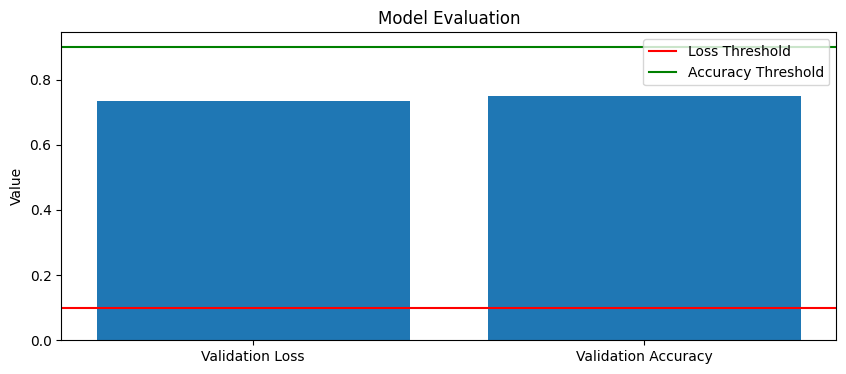

In [ ]:
# Set a threshold for loss and accuracy
loss_threshold = 0.1
accuracy_threshold = 0.9

# Create a bar chart to visualize the values against thresholds
plt.figure(figsize=(10, 4))
plt.bar(['Validation Loss', 'Validation Accuracy'], [loss, accuracy])
plt.axhline(y=loss_threshold, color='r', linestyle='-', label='Loss Threshold')
plt.axhline(y=accuracy_threshold, color='g', linestyle='-', label='Accuracy Threshold')
plt.title('Model Evaluation')
plt.ylabel('Value')
plt.legend()
plt.show()

As we can see here, **Neural networks** achieved significantly higher accuracy than a **perceptron**. It is because of their ability to learn complex patterns, represent **non-linear** relationships and benefit from **backpropagation** and automatic feature learning make them a powerful tool for a wide range of machine learning tasks.
<br>

While perceptrons are a simpler model, they are often limited in their ability to handle complex problems

# Neural Networks implementation on `MNIST` data using TensorFlow

## MNIST Dataset

The MNIST (Modified National Institute of Standards and Technology) database is a widely used dataset in the field of machine learning,
specifically for image classification tasks. It consists of 60,000 training images and 10,000 testing images, each 28x28 grayscale images of **handwritten digits** from 0 to 9. ([learn more](https://colah.github.io/posts/2014-10-Visualizing-MNIST/))

<img src='https://miro.medium.com/v2/resize:fit:1280/format:webp/1*B9pCFLFsx50PGaCYy2U_sw.gif' width=300>

## Problem
Now the idea is to input each handwritten digit to the neural network and classify what that image of the hand written digit signifies.

<img src='https://miro.medium.com/v2/resize:fit:1160/format:webp/0*u5-PcKYVfUE5s2by.gif' width=400>

As the above image suggests,
* Each image of the handwritten digit is **flattened** first. That is,
  * **Image shape:** (28, 28, 1)
  * **After Flattening:** (784, 1)
  * We are simply multiplying the first 2 dimensions of the image.
* Now this flattened image is passed down to the feed forward neural network through the hidden layers and finally outputs the result between 0 to 9.





## Load and preprocess the dataset

In [ ]:
# Importing necessary libraries

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

In [ ]:
# 1. Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Normalization

The pixel values are **normalized** to the range
[0,1] by dividing by 255.

* **Without normalization**, the network would see input features (pixel values) that vary significantly in scale (some very high, others low).
* When features have large values, they can cause larger weight updates during backpropagation, leading to a very erratic optimization process.

In [ ]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Flatten the images to 1D vectors (28*28 = 784 features)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)


### Converting labels to one hot vector?

The digits 0,1,2,…,9 are categorical (i.e., different classes), not ordinal. If you use the raw label numbers (e.g., 0, 1, 2, etc.) directly, the model may assume there's a numerical relationship between them, like 9 is greater than 0 or 2 is less than 3. This is not true in classification tasks.

One-hot encoding prevents the model from assigning importance or relationships based on the magnitude of the class labels, by creating an independent binary vector for each class.

**One hot encoding representation:**

<img src='https://codecraft.tv/courses/tensorflowjs/neural-networks/mnist-training-data/img/exports/5.mnist.001.jpeg' width=500>

Here:

* The length of the vector is equal to the number of classes (10 in the case of MNIST).
* The value 1 is placed in the position corresponding to the true class (9 in this case), and all other positions are 0.


In [ ]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


## Building the model

We shall be building a neural network using `tf.keras.Sequential`.
* **Input:** 784 flattened features of the image
* **Hidden layer 1:** 128 neurons
* **Hidden layer 2:** 64 neurons
* **Output:** 10 neurons

In [ ]:
# 2. Build the feedforward neural network model
model = models.Sequential([
    layers.Input(shape=(28 * 28,)),  # Input layer (28x28 = 784 flattened image)
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    layers.Dense(64, activation='relu'),  # Another fully connected layer with 64 neurons
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons for 10 classes
])


In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

## Compiling the model

In [ ]:
# 3. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
# 4. Train the model

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9946 - loss: 0.0171 - val_accuracy: 0.9795 - val_loss: 0.0917
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9960 - loss: 0.0122 - val_accuracy: 0.9775 - val_loss: 0.0952
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9966 - loss: 0.0111 - val_accuracy: 0.9777 - val_loss: 0.1026
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9962 - loss: 0.0112 - val_accuracy: 0.9753 - val_loss: 0.1078
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9970 - loss: 0.0099 - val_accuracy: 0.9792 - val_loss: 0.1017
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9966 - loss: 0.0101 - val_accuracy: 0.9785 - val_loss: 0.1098
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9969 - loss: 0.0092 - val_accuracy: 0.9785 - val_loss: 0.1164
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9967 - loss: 0.0090 - val_accuracy: 0.

## Evaluating the model

In [ ]:
# 5. Evaluate the model

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9746 - loss: 0.1157
Test accuracy: 0.9778000116348267


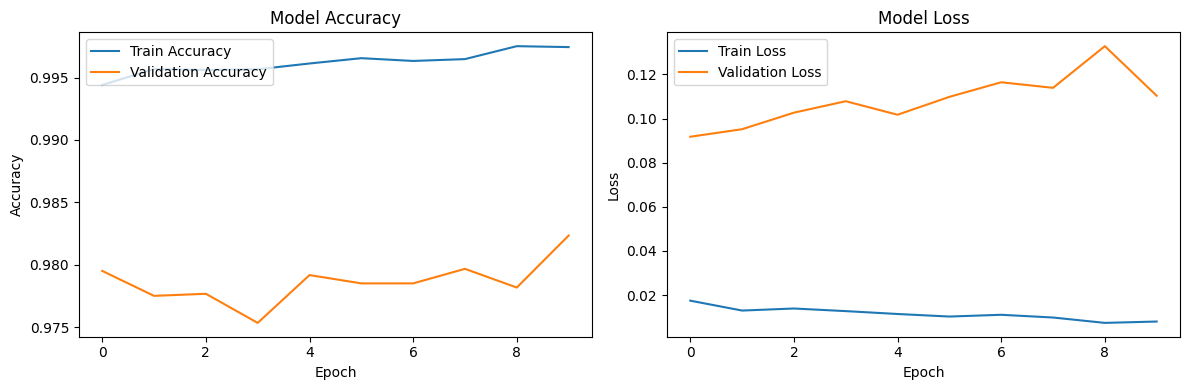

In [ ]:
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
